In [1]:
import ezgal
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

### First reproduce relation in RM1

C:\Users\Zhiyuan\anaconda3\envs\Rubin_red\Lib\site-packages\ezgal-2.0-py3.10.egg\ezgal/data/\models/bc03_ssp_z_0.02_salp.model


Text(0.5, 0, 'redshift')

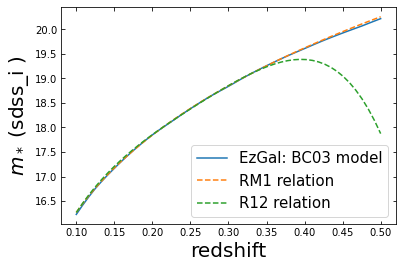

In [11]:
def RM1_mz (z):
    m_z = 22.44 + 3.36*np.log(z) + 0.273*np.log(z)**2 - 0.0618 * np.log(z)**3 - 0.0227 * np.log(z)**4
    return(m_z)
def R12_ma (z):
    m_z = 12.27 + 62.36*z - 289.79*z**2 + 729.69 * z**3 - 709.42*z**4
    return(m_z)

model = ezgal.model( 'bc03_ssp_z_0.02_salp.model' )
model.set_ab_output()
# As set by redMapper in SDSS i band
model.set_normalization( 'sloan_i', 0.2, 17.85,apparent=True)
zf = 3
# fetch an array of redshifts out to given formation redshift
zs = np.linspace(0.1,0.5,50)#model.get_zs( 0.5)
plt.figure(figsize = (6,4))
plt.plot( zs, model.get_apparent_mags( zf, filters='sloan_i', zs=zs ), '-', label='EzGal: BC03 model')
plt.legend()
plt.plot( zs, RM1_mz(zs),'--',label = 'RM1 relation')
plt.plot( zs, R12_ma(zs),'--',label = 'R12 relation')
plt.legend(fontsize = 15)
plt.ylabel('$m_*$ (sdss_i )',fontsize = 20)
plt.xlabel('redshift',fontsize = 20)
#plt.savefig('plots/m_pivot.pdf')

### Next see results in LSST y band

In [3]:
model = ezgal.model( 'bc03_ssp_z_0.02_salp.model' )
model.set_ab_output()
model.set_normalization( 'sloan_i', 0.2, 17.85,apparent=True)
zf = 3

C:\Users\Zhiyuan\anaconda3\envs\Rubin_red\Lib\site-packages\ezgal-2.0-py3.10.egg\ezgal/data/\models/bc03_ssp_z_0.02_salp.model


high-lum sample

In [4]:
np.log10(1)/(-0.4)+model.get_apparent_mags( zf = 3., filters='LSST_i', zs=0.84)

22.005335133650384

high-dens sample

In [5]:
np.log10(0.4)/(-0.4)+model.get_apparent_mags( zf = 3., filters='LSST_i', zs=0.84)

23.000185155330477

### Lastly Roman filters

C:\Users\Zhiyuan\anaconda3\envs\Rubin_red\Lib\site-packages\ezgal-2.0-py3.10.egg\ezgal/data/\models/bc03_ssp_z_0.02_chab.model


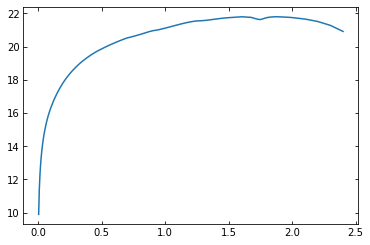

In [6]:
model = ezgal.model( 'bc03_ssp_z_0.02_chab.model' )
model.set_ab_output()
model.set_normalization( 'Roman_F', 0.2, 17.85,apparent=True)
zf = 2.5
# fetch an array of redshifts out to given formation redshift
zs = model.get_zs( zf )
#plt.plot( zs, model.get_apparent_mags( zf, filters='LSST_y', zs=zs ), 'ro--', label='Roman Y')
#plt.plot( zs, model.get_apparent_mags( zf, filters='Sloan_i', zs=zs ), 'go--', label='Roman Y')
plt.plot( zs, model.get_apparent_mags( zf, filters='Roman_F', zs=zs ), '-', label='Roman Y')
#plt.plot( zs, RM1_mz(zs),'--')


### Combined results

C:\Users\Zhiyuan\anaconda3\envs\Rubin_red\Lib\site-packages\ezgal-2.0-py3.10.egg\ezgal/data/\models/bc03_ssp_z_0.02_salp.model


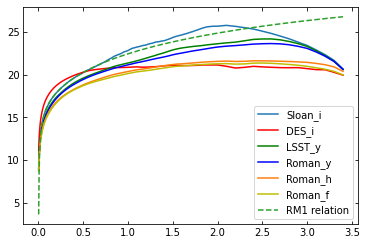

In [7]:
model = ezgal.model( 'bc03_ssp_z_0.02_salp.model' )
model.set_ab_output()
model.set_normalization( 'Sloan_i', 0.2, 17.85,apparent=True)
zf = 3.5
# fetch an array of redshifts out to given formation redshift
zs = model.get_zs( zf )
#plt.plot( zs, model.get_apparent_mags( zf, filters='LSST_y', zs=zs ), 'ro--', label='Roman Y')
#plt.plot( zs, model.get_apparent_mags( zf, filters='Sloan_i', zs=zs ), 'go--', label='Roman Y')
plt.plot( zs, model.get_apparent_mags( zf, filters='Sloan_i', zs=zs ), '-', label='Sloan_i')
plt.plot( zs, model.get_apparent_mags( zf, filters='DES_i', zs=zs ), 'r-', label='DES_i')
plt.plot( zs, model.get_apparent_mags( zf, filters='LSST_y', zs=zs ), 'g-', label='LSST_y')
plt.plot( zs, model.get_apparent_mags( zf, filters='Roman_y', zs=zs ), 'b-', label='Roman_y')
plt.plot( zs, model.get_apparent_mags( zf, filters='Roman_h', zs=zs ), '-', label='Roman_h')
plt.plot( zs, model.get_apparent_mags( zf, filters='Roman_f', zs=zs ), 'y-', label='Roman_f')
plt.plot( zs, RM1_mz(zs),'--',label = 'RM1 relation')
plt.legend()

In [8]:
'''
file_dir = 'scidoc1735.txt'
filter_wlen = np.loadtxt(file_dir,usecols=0)
filter_tp = np.loadtxt(file_dir,usecols=1)
A = np.zeros(shape = (len(filter_wlen),2))
A[:,0] = filter_wlen*10
A[:,1] = filter_tp
np.savetxt('DES_i', A, delimiter=' ')


file_dir = 'total_y.dat'
filter_wlen = np.loadtxt(file_dir,usecols=0)
filter_tp = np.loadtxt(file_dir,usecols=1)

A = np.zeros(shape = (len(filter_wlen),2))
A[:,0] = filter_wlen*10
A[:,1] = filter_tp
np.savetxt('LSST_y', A, delimiter=' ')
'''

"\nfile_dir = 'scidoc1735.txt'\nfilter_wlen = np.loadtxt(file_dir,usecols=0)\nfilter_tp = np.loadtxt(file_dir,usecols=1)\nA = np.zeros(shape = (len(filter_wlen),2))\nA[:,0] = filter_wlen*10\nA[:,1] = filter_tp\nnp.savetxt('DES_i', A, delimiter=' ')\n\n\nfile_dir = 'total_y.dat'\nfilter_wlen = np.loadtxt(file_dir,usecols=0)\nfilter_tp = np.loadtxt(file_dir,usecols=1)\n\nA = np.zeros(shape = (len(filter_wlen),2))\nA[:,0] = filter_wlen*10\nA[:,1] = filter_tp\nnp.savetxt('LSST_y', A, delimiter=' ')\n"